<a href="https://colab.research.google.com/github/nolanminhdinh/Historical-Stock-Price-Prediction-Model/blob/main/Collection_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Cài đặt và import thư viện

In [ ]:
!pip install -U vnstock
import vnstock

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 kB 4.1 MB/s eta 0:00:00


# 2. Lấy dữ liệu

## 2.1. Lấy dữ liệu giá cổ phiếu

In [ ]:
from vnstock import Vnstock
vns = Vnstock()

#Lấy dữ liệu giá lịch sử
df = vns.stock(symbol='HPG', source='TCBS').quote.history(
    start='2010-01-01', end='2025-10-31', interval='1D'
) #Thay đổi symbol với mã cổ phiếu tương ứng, điều chỉnh start và end tuỳ theo khung thời gian muốn lấy dữ liệu

print(df.head())

ModuleNotFoundError: No module named 'vnstock'

## 2.2. Dữ liệu VNINDEX

In [ ]:
from vnstock import Quote

#Tạo đối tượng Quote cho chỉ số VNINDEX
vnindex = Quote(symbol='VNINDEX', source='TCBS')

#Lấy dữ liệu lịch sử giá
data = vnindex.history(
    start='2010-01-01',
    end='2025-10-31',
    interval='1D'
)

print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        time   open   high    low  close    volume
0 2010-01-04  501.7  517.1  501.7  517.1  42051600
1 2010-01-05  538.8  539.4  530.2  532.5  66619450
2 2010-01-06  527.4  538.8  526.4  534.5  64222280
3 2010-01-07  536.8  540.8  530.7  533.3  66287110
4 2010-01-08  541.0  544.5  520.9  520.9  76177100


In [ ]:
import time

for idx in ['VNINDEX', 'VN30', 'HNXINDEX', 'UPCOMINDEX']:
    q = Quote(symbol=idx, source='TCBS')
    data = q.history(start='2010-01-01', end='2025-10-31', interval='1D')
    print(f"{idx} có {len(data)} dòng dữ liệu")
    time.sleep(30) # Add a delay of 30 seconds between requests

VNINDEX có 4000 dòng dữ liệu
VN30 có 3479 dòng dữ liệu
HNXINDEX có 4000 dòng dữ liệu
UPCOMINDEX có 3956 dòng dữ liệu


# 3. Hợp nhất dữ liệu

In [ ]:
import time
import pandas as pd
from vnstock import Quote
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

#Danh sách chỉ số và cổ phiếu
indices = ['VNINDEX', 'VN30', 'HNXINDEX', 'UPCOMINDEX'] #Chỉ số chứng khoán
stocks = ['HPG']  #Mã cổ phiếu

def get_quote_data(symbol, start='2010-01-01', end='2025-10-31', interval='1D'):
    q = Quote(symbol=symbol, source='TCBS')
    data = q.history(start=start, end=end, interval=interval)

    #Kiểm tra cột thời gian có tên gì
    if 'date' in data.columns:
        date_col = 'date'
    elif 'time' in data.columns:
        date_col = 'time'
    elif 'tradingDate' in data.columns:
        date_col = 'tradingDate'
    else:
        print(f" Mã {symbol} không có cột ngày hợp lệ, bỏ qua.")
        return pd.DataFrame()

    #Kiểm tra dữ liệu có rỗng không
    if data.empty:
        print(f" Mã {symbol} không có dữ liệu.")
        return pd.DataFrame()

    #Giữ lại các cột cần thiết
    cols = [date_col, 'close', 'volume']
    available_cols = [c for c in cols if c in data.columns]
    data = data[available_cols]

    # Chuyển đổi cột ngày sang định dạng datetime và loại bỏ các ngày trùng lặp
    data[date_col] = pd.to_datetime(data[date_col])
    data = data.drop_duplicates(subset=[date_col], keep='last')

    #Đổi tên cột để thống nhất
    data = data.rename(columns={date_col: 'date', 'close': f'{symbol}_close', 'volume': f'{symbol}_volume'})

    return data

#Tạo danh sách tổng hợp
all_symbols = indices + stocks

merged_df = None
for symbol in all_symbols:
    print(f' Đang tải dữ liệu {symbol} ...')
    df = get_quote_data(symbol)
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='date', how='outer')
    time.sleep(40)

# Chuẩn hóa dữ liệu
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df = merged_df.sort_values('date').reset_index(drop=True)

# Hiển thị kết quả
print("\n Dữ liệu tổng hợp:")
print(merged_df.head())

# Lưu CSV
if merged_df is not None:
    save_path = '/content/drive/MyDrive/Phân tích dữ liệu chuỗi thời gian/Bài tập lớn/Data Crawl/market_stock_HPG_data.csv'
    merged_df.to_csv(save_path, index=False)
    print(f"\n Đã lưu file dữ liệu vào Google Drive: {save_path}")
else:
    print(" Không có dữ liệu hợp lệ.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔹 Đang tải dữ liệu VNINDEX ...
🔹 Đang tải dữ liệu VN30 ...
🔹 Đang tải dữ liệu HNXINDEX ...
🔹 Đang tải dữ liệu UPCOMINDEX ...
🔹 Đang tải dữ liệu HPG ...

 Dữ liệu tổng hợp:
        date  VNINDEX_close  VNINDEX_volume  VN30_close  VN30_volume  \
0 2010-01-04          517.1        42051600         NaN          NaN   
1 2010-01-05          532.5        66619450         NaN          NaN   
2 2010-01-06          534.5        64222280         NaN          NaN   
3 2010-01-07          533.3        66287110         NaN          NaN   
4 2010-01-08          520.9        76177100         NaN          NaN   

   HNXINDEX_close  HNXINDEX_volume  UPCOMINDEX_close  UPCOMINDEX_volume  \
0           179.8         26326800               NaN                NaN   
1           183.3         36438200              54.3           359304.0   
2           179.6         40892900       

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3947 entries, 0 to 3946
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               3947 non-null   datetime64[ns]
 1   VNINDEX_close      3947 non-null   float64       
 2   VNINDEX_volume     3947 non-null   int64         
 3   VN30_close         3427 non-null   float64       
 4   VN30_volume        3427 non-null   float64       
 5   HNXINDEX_close     3947 non-null   float64       
 6   HNXINDEX_volume    3947 non-null   int64         
 7   UPCOMINDEX_close   3893 non-null   float64       
 8   UPCOMINDEX_volume  3893 non-null   float64       
 9   HPG_close          3947 non-null   float64       
 10  HPG_volume         3947 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 339.3 KB


### Kiểm tra bản ghi trùng lăp

In [ ]:
merged_df.duplicated().sum()

np.int64(0)

### Kiểm tra giá trị thiếu (NaN) trong DataFrame đã hợp nhất

In [ ]:
merged_df.isna().sum()

,0
date,0
VNINDEX_close,0
VNINDEX_volume,0
VN30_close,520
VN30_volume,520
HNXINDEX_close,0
HNXINDEX_volume,0
UPCOMINDEX_close,54
UPCOMINDEX_volume,54
HPG_close,0


### Kiểm tra ngày bị thiếu trong `merged_df`

In [ ]:
# Lấy ngày bắt đầu và kết thúc từ DataFrame
start_date = merged_df['date'].min()
end_date = merged_df['date'].max()

# Tạo một chuỗi ngày đầy đủ
full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Tìm các ngày bị thiếu
missing_dates = full_date_range[~full_date_range.isin(merged_df['date'])]

if not missing_dates.empty:
    print(f'Số lượng ngày bị thiếu: {len(missing_dates)}')
    print('Các ngày bị thiếu là:')
    for date in missing_dates:
        print(date.strftime('%Y-%m-%d'))
else:
    print('Không có ngày nào bị thiếu trong DataFrame.')

Số lượng ngày bị thiếu: 1833
Các ngày bị thiếu là:
2010-01-09
2010-01-10
2010-01-16
2010-01-17
2010-01-23
2010-01-24
2010-01-30
2010-01-31
2010-02-06
2010-02-07
2010-02-13
2010-02-14
2010-02-15
2010-02-16
2010-02-17
2010-02-18
2010-02-19
2010-02-20
2010-02-21
2010-02-27
2010-02-28
2010-03-06
2010-03-07
2010-03-13
2010-03-14
2010-03-20
2010-03-21
2010-03-27
2010-03-28
2010-04-03
2010-04-04
2010-04-10
2010-04-11
2010-04-17
2010-04-18
2010-04-23
2010-04-24
2010-04-25
2010-04-30
2010-05-01
2010-05-02
2010-05-03
2010-05-08
2010-05-09
2010-05-15
2010-05-16
2010-05-22
2010-05-23
2010-05-29
2010-05-30
2010-06-05
2010-06-06
2010-06-12
2010-06-13
2010-06-19
2010-06-20
2010-06-26
2010-06-27
2010-07-03
2010-07-04
2010-07-10
2010-07-11
2010-07-17
2010-07-18
2010-07-24
2010-07-25
2010-07-31
2010-08-01
2010-08-07
2010-08-08
2010-08-14
2010-08-15
2010-08-21
2010-08-22
2010-08-28
2010-08-29
2010-09-02
2010-09-03
2010-09-04
2010-09-05
2010-09-11
2010-09-12
2010-09-18
2010-09-19
2010-09-25
2010-09-26
201

### Kiểm tra năm có dữ liệu đầy đủ cho tất cả các chỉ số

In [ ]:
# Lấy danh sách các cột cần kiểm tra
columns_to_check = [col for col in merged_df.columns if col not in ['date']]

# Khởi tạo một dictionary để lưu trữ năm bắt đầu có dữ liệu không NaN cho mỗi cột
first_non_nan_year = {}

for col in columns_to_check:
    # Tìm chỉ mục của giá trị không NaN đầu tiên trong cột
    first_valid_idx = merged_df[col].first_valid_index()
    if first_valid_idx is not None:
        # Lấy ngày tương ứng với chỉ mục đó và trích xuất năm
        year = merged_df.loc[first_valid_idx, 'date'].year
        first_non_nan_year[col] = year
    else:
        first_non_nan_year[col] = 'Không có dữ liệu hợp lệ'

print("Năm đầu tiên có dữ liệu không NaN cho mỗi cột:")
for col, year in first_non_nan_year.items():
    print(f"- {col}: {year}")

# Tìm năm muộn nhất trong số các năm bắt đầu có dữ liệu không NaN
# Điều này sẽ cho chúng ta năm mà TẤT CẢ các cột bắt đầu có dữ liệu
valid_years = [year for year in first_non_nan_year.values() if isinstance(year, int)]

if valid_years:
    earliest_full_data_year = max(valid_years)
    print(f"\nNăm sớm nhất mà TẤT CẢ các chỉ số có dữ liệu đầy đủ là: {earliest_full_data_year}")
else:
    print("\nKhông tìm thấy năm mà tất cả các chỉ số có dữ liệu đầy đủ.")

Năm đầu tiên có dữ liệu không NaN cho mỗi cột:
- VNINDEX_close: 2010
- VNINDEX_volume: 2010
- VN30_close: 2012
- VN30_volume: 2012
- HNXINDEX_close: 2010
- HNXINDEX_volume: 2010
- UPCOMINDEX_close: 2010
- UPCOMINDEX_volume: 2010
- HPG_close: 2010
- HPG_volume: 2010

Năm sớm nhất mà TẤT CẢ các chỉ số có dữ liệu đầy đủ là: 2012


### Kiểm tra các ngày bị thiếu có phải là thứ 7 hoặc Chủ Nhật không

In [ ]:
import calendar

weekend_missing_dates = []
weekday_missing_dates = []

for date in missing_dates:
    # 5 là thứ 6, 6 là thứ 7 (Monday=0, Sunday=6)
    if date.weekday() == calendar.SATURDAY or date.weekday() == calendar.SUNDAY:
        weekend_missing_dates.append(date.strftime('%Y-%m-%d'))
    else:
        weekday_missing_dates.append(date.strftime('%Y-%m-%d'))

if weekend_missing_dates:
    print(f"Số lượng ngày cuối tuần bị thiếu: {len(weekend_missing_dates)}")
    print("Các ngày cuối tuần bị thiếu:")
    for date_str in weekend_missing_dates:
        print(date_str)
else:
    print("Không có ngày cuối tuần nào bị thiếu trong danh sách.")

if weekday_missing_dates:
    print(f"\nSố lượng ngày trong tuần bị thiếu: {len(weekday_missing_dates)}")
    print("Các ngày trong tuần bị thiếu:")
    for date_str in weekday_missing_dates:
        print(date_str)
else:
    print("Không có ngày trong tuần nào bị thiếu trong danh sách.")


Số lượng ngày cuối tuần bị thiếu: 1650
Các ngày cuối tuần bị thiếu:
2010-01-09
2010-01-10
2010-01-16
2010-01-17
2010-01-23
2010-01-24
2010-01-30
2010-01-31
2010-02-06
2010-02-07
2010-02-13
2010-02-14
2010-02-20
2010-02-21
2010-02-27
2010-02-28
2010-03-06
2010-03-07
2010-03-13
2010-03-14
2010-03-20
2010-03-21
2010-03-27
2010-03-28
2010-04-03
2010-04-04
2010-04-10
2010-04-11
2010-04-17
2010-04-18
2010-04-24
2010-04-25
2010-05-01
2010-05-02
2010-05-08
2010-05-09
2010-05-15
2010-05-16
2010-05-22
2010-05-23
2010-05-29
2010-05-30
2010-06-05
2010-06-06
2010-06-12
2010-06-13
2010-06-19
2010-06-20
2010-06-26
2010-06-27
2010-07-03
2010-07-04
2010-07-10
2010-07-11
2010-07-17
2010-07-18
2010-07-24
2010-07-25
2010-07-31
2010-08-01
2010-08-07
2010-08-08
2010-08-14
2010-08-15
2010-08-21
2010-08-22
2010-08-28
2010-08-29
2010-09-04
2010-09-05
2010-09-11
2010-09-12
2010-09-18
2010-09-19
2010-09-25
2010-09-26
2010-10-02
2010-10-03
2010-10-09
2010-10-10
2010-10-16
2010-10-17
2010-10-23
2010-10-24
2010-10-

In [ ]:
# Lọc dữ liệu từ tháng 3 năm 2012 trở đi
merged_df_filtered = merged_df[(merged_df['date'].dt.year > 2012) | \
                                     ((merged_df['date'].dt.year == 2012) & (merged_df['date'].dt.month >= 3))]

print(f"DataFrame sau khi cắt: {len(merged_df_filtered)} dòng")
display(merged_df_filtered.head())

DataFrame sau khi cắt: 3412 dòng


,date,VNINDEX_close,VNINDEX_volume,VN30_close,VN30_volume,HNXINDEX_close,HNXINDEX_volume,UPCOMINDEX_close,UPCOMINDEX_volume,HPG_close,HPG_volume
535,2012-03-01,427.95,58982220,491.01,22342000.0,69.58,62875700,34.62,238600.0,0.98,622020
536,2012-03-02,439.60,74979590,503.54,26665530.0,71.72,71804400,34.88,422200.0,1.00,838520
537,2012-03-05,457.21,65544530,524.94,29555260.0,75.78,33108500,35.40,338800.0,1.05,933110
538,2012-03-06,445.00,143229740,508.41,45858720.0,75.20,173044800,35.08,582000.0,1.02,1259710
539,2012-03-07,444.02,97945750,505.90,36337800.0,75.03,115357200,34.88,246500.0,1.03,1115590


### Xử lý các ngày bị thiếu để có chuỗi thời gian liên tục

In [ ]:
# Đảm bảo cột 'date' là datetime và đặt làm index
processed_df = merged_df_filtered .set_index('date')

# Lấy ngày bắt đầu và kết thúc từ DataFrame hiện có
start_date = processed_df.index.min()
end_date = processed_df.index.max()

# Tạo một chuỗi ngày đầy đủ (bao gồm cả cuối tuần)
full_calendar_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Lọc ra chỉ các ngày trong tuần (thứ 2 đến thứ 6)
full_weekday_range = full_calendar_range[full_calendar_range.dayofweek < 5] # Monday=0, Sunday=6

# Tái lập chỉ mục DataFrame bằng chuỗi ngày trong tuần đầy đủ
# Điều này sẽ thêm các hàng cho những ngày trong tuần bị thiếu với giá trị NaN
processed_df = processed_df.reindex(full_weekday_range)

# Điền các giá trị NaN bằng phương pháp ffill (forward fill)
# Phương pháp này sẽ điền giá trị cuối cùng hợp lệ vào các ô NaN, nhưng chỉ trong phạm vi các ngày trong tuần
processed_df = processed_df.ffill()

# Đặt lại cột 'date' về một cột thông thường và reset index
processed_df = processed_df.reset_index().rename(columns={'index': 'date'})

print("DataFrame sau khi xử lý các ngày bị thiếu (ffill) và loại bỏ cuối tuần:")
display(processed_df.head(10))
print(f"Tổng số dòng sau khi xử lý: {len(processed_df)}")

# Kiểm tra lại số lượng giá trị NaN
print('\nSố lượng giá trị NaN trong mỗi cột của DataFrame sau khi điền dữ liệu:')
display(processed_df.isnull().sum())

DataFrame sau khi xử lý các ngày bị thiếu (ffill) và loại bỏ cuối tuần:


,date,VNINDEX_close,VNINDEX_volume,VN30_close,VN30_volume,HNXINDEX_close,HNXINDEX_volume,UPCOMINDEX_close,UPCOMINDEX_volume,HPG_close,HPG_volume
0,2012-03-01,427.95,58982220.0,491.01,22342000.0,69.58,62875700.0,34.62,238600.0,0.98,622020.0
1,2012-03-02,439.60,74979590.0,503.54,26665530.0,71.72,71804400.0,34.88,422200.0,1.00,838520.0
2,2012-03-05,457.21,65544530.0,524.94,29555260.0,75.78,33108500.0,35.40,338800.0,1.05,933110.0
3,2012-03-06,445.00,143229740.0,508.41,45858720.0,75.20,173044800.0,35.08,582000.0,1.02,1259710.0
4,2012-03-07,444.02,97945750.0,505.90,36337800.0,75.03,115357200.0,34.88,246500.0,1.03,1115590.0
5,2012-03-08,431.66,83407280.0,489.05,28423440.0,71.83,93113800.0,34.74,164300.0,0.98,1247170.0
6,2012-03-09,432.11,71638930.0,487.03,24564720.0,71.56,65531500.0,34.58,162000.0,0.98,1305980.0
7,2012-03-12,428.02,68550570.0,482.65,25924400.0,69.26,52103000.0,34.30,211100.0,0.93,551660.0
8,2012-03-13,429.39,58475180.0,486.42,21389800.0,70.54,74815100.0,34.39,124400.0,0.94,396370.0
9,2012-03-14,433.86,59926960.0,491.23,21343890.0,69.28,63698700.0,34.50,102900.0,0.94,645070.0


Tổng số dòng sau khi xử lý: 3567

Số lượng giá trị NaN trong mỗi cột của DataFrame sau khi điền dữ liệu:


,0
date,0
VNINDEX_close,0
VNINDEX_volume,0
VN30_close,0
VN30_volume,0
HNXINDEX_close,0
HNXINDEX_volume,0
UPCOMINDEX_close,0
UPCOMINDEX_volume,0
HPG_close,0


In [ ]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3567 entries, 0 to 3566
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               3567 non-null   datetime64[ns]
 1   VNINDEX_close      3567 non-null   float64       
 2   VNINDEX_volume     3567 non-null   float64       
 3   VN30_close         3567 non-null   float64       
 4   VN30_volume        3567 non-null   float64       
 5   HNXINDEX_close     3567 non-null   float64       
 6   HNXINDEX_volume    3567 non-null   float64       
 7   UPCOMINDEX_close   3567 non-null   float64       
 8   UPCOMINDEX_volume  3567 non-null   float64       
 9   HPG_close          3567 non-null   float64       
 10  HPG_volume         3567 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 306.7 KB


# 3. Lưu DataFrame đã xử lý vào Google Drive

In [ ]:
if processed_df is not None:
    new_save_path = '/content/drive/MyDrive/Phân tích dữ liệu chuỗi thời gian/Bài tập lớn/Data Crawl/market_stock_HPG_processed_data.csv'
    processed_df.to_csv(new_save_path, index=False)
    print(f"\n Đã lưu file dữ liệu đã xử lý vào Google Drive: {new_save_path}")
else:
    print(" Không có dữ liệu hợp lệ để lưu.")


 Đã lưu file dữ liệu đã xử lý vào Google Drive: /content/drive/MyDrive/Phân tích dữ liệu chuỗi thời gian/Bài tập lớn/Data Crawl/market_stock_HPG_processed_data.csv


### Biểu đồ so sánh dữ liệu trước và sau xử lý

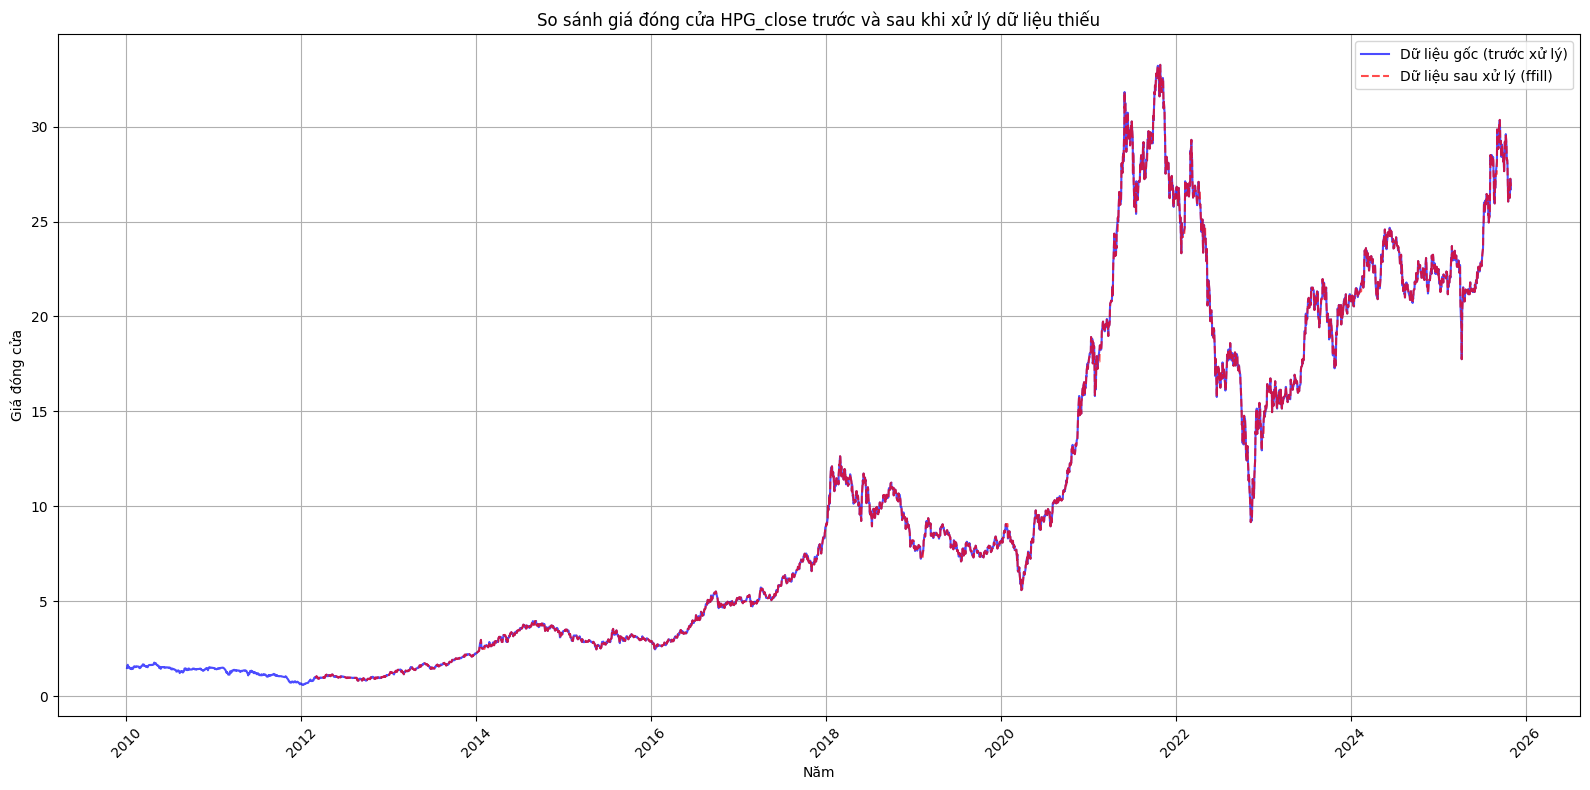

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đường dẫn đến các file
original_file_path = '/content/drive/MyDrive/Phân tích dữ liệu chuỗi thời gian/Bài tập lớn/Data Crawl/market_stock_HPG_data.csv'
processed_file_path = '/content/drive/MyDrive/Phân tích dữ liệu chuỗi thời gian/Bài tập lớn/Data Crawl/market_stock_HPG_processed_data.csv'

# Đọc dữ liệu từ cả hai file
df_original = pd.read_csv(original_file_path)
df_processed = pd.read_csv(processed_file_path)

# Chuyển đổi cột 'date' sang định dạng datetime
df_original['date'] = pd.to_datetime(df_original['date'])
df_processed['date'] = pd.to_datetime(df_processed['date'])

# Chọn một mã để so sánh, ví dụ VNINDEX_close
compare_col = 'HPG_close'

plt.figure(figsize=(16, 8))
sns.lineplot(x='date', y=compare_col, data=df_original, label='Dữ liệu gốc (trước xử lý)', color='blue', alpha=0.7)
sns.lineplot(x='date', y=compare_col, data=df_processed, label='Dữ liệu sau xử lý (ffill)', color='red', linestyle='--', alpha=0.7)

plt.title(f'So sánh giá đóng cửa {compare_col} trước và sau khi xử lý dữ liệu thiếu')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()